#PyCaret Binary Classification
* PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

* Here i'll be perfroming the Binary Classification code and requirements to run code


# Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

# To start with
PyCaret's Classification Module is a supervised learning tool used for categorizing data into groups. It predicts categorical labels, like whether a customer will default on credit card payments (Yes/No). The module supports both binary and multiclass problems and includes data preprocessing through the setup function. It offers over 18 built-in algorithms and various plots for performance analysis.

A typical PyCaret workflow includes five steps: Setup, Compare Models, Analyze Model, Prediction, and Save Model.

* I'll be using bindary classification for the above data set


In [3]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

In [5]:
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [7]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'default', session_id = 111)

,Description,Value
0,Session id,111
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


Once the setup is successfully executed in PyCaret, an information grid appears summarizing key experiment details:

* Session ID: A pseudo-random seed for reproducibility. If not provided, one is generated and shared across functions.
* Target Type: Automatically detected as Binary, Multiclass, or Regression.
* Label Encoding: Converts string target labels (e.g., 'Yes'/'No') into numeric values (0/1). If the target is already numeric, no encoding is needed.
* Original Data Shape: The dataset's shape before any transformations.
* Transformed Train/Test Shape: The shape of the train and test sets after transformations.
* Numeric Features: The number of features classified as numerical.
Categorical Features: The number of features classified as categorical.

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.
With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.


In [25]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
experiment = ClassificationExperiment()

In [27]:
# check the type of experiment
type(experiment)

pycaret.classification.oop.ClassificationExperiment

In [28]:
# init setup on experiment
experiment.setup(data, target = 'default', session_id = 111)

,Description,Value
0,Session id,111
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


Compare Models
The compare_models function trains and evaluates all available models in the library using cross-validation. It outputs a scoring grid showing the average performance of each model. You can view the evaluation metrics used during cross-validation with the get_metrics function. Additionally, custom metrics can be added or removed using the add_metric and remove_metric functions.

In [11]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8207,0.7787,0.3735,0.6700,0.4793,0.3814,0.4053,11.6580
gbc,Gradient Boosting Classifier,0.8205,0.7804,0.3670,0.6741,0.4748,0.3777,0.4034,6.2870
lightgbm,Light Gradient Boosting Machine,0.8190,0.7753,0.3619,0.6694,0.4692,0.3716,0.3975,1.5860
ada,Ada Boost Classifier,0.8170,0.7736,0.3242,0.6824,0.4392,0.3460,0.3805,1.2920
rf,Random Forest Classifier,0.8165,0.7573,0.3718,0.6490,0.4726,0.3713,0.3926,4.1280
xgboost,Extreme Gradient Boosting,0.8120,0.7565,0.3678,0.6286,0.4637,0.3590,0.3782,0.6170
lda,Linear Discriminant Analysis,0.8107,0.7163,0.2512,0.7033,0.3695,0.2864,0.3396,0.0630
et,Extra Trees Classifier,0.8098,0.7474,0.3594,0.6215,0.4552,0.3498,0.3692,1.9750
lr,Logistic Regression,0.8032,0.6979,0.2100,0.6811,0.3195,0.2406,0.2986,2.0130
ridge,Ridge Classifier,0.7963,0.7163,0.1344,0.7085,0.2254,0.1668,0.2452,0.0900


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8207,0.7787,0.3735,0.6700,0.4793,0.3814,0.4053,12.1390
gbc,Gradient Boosting Classifier,0.8205,0.7804,0.3670,0.6741,0.4748,0.3777,0.4034,6.1550
lightgbm,Light Gradient Boosting Machine,0.8190,0.7753,0.3619,0.6694,0.4692,0.3716,0.3975,0.9640
ada,Ada Boost Classifier,0.8170,0.7736,0.3242,0.6824,0.4392,0.3460,0.3805,1.2460
rf,Random Forest Classifier,0.8165,0.7573,0.3718,0.6490,0.4726,0.3713,0.3926,4.0730
xgboost,Extreme Gradient Boosting,0.8120,0.7565,0.3678,0.6286,0.4637,0.3590,0.3782,0.7230
lda,Linear Discriminant Analysis,0.8107,0.7163,0.2512,0.7033,0.3695,0.2864,0.3396,0.0640
et,Extra Trees Classifier,0.8098,0.7474,0.3594,0.6215,0.4552,0.3498,0.3692,1.9500
lr,Logistic Regression,0.8032,0.6979,0.2100,0.6811,0.3195,0.2406,0.2986,1.3730
ridge,Ridge Classifier,0.7963,0.7163,0.1344,0.7085,0.2254,0.1668,0.2452,0.0420


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

The output remains consistent between the functional and OOP APIs. For the rest of the notebook, only the functional API will be demonstrated.

## Analyze Model
we can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases, but here we aldredy have the trained model's.

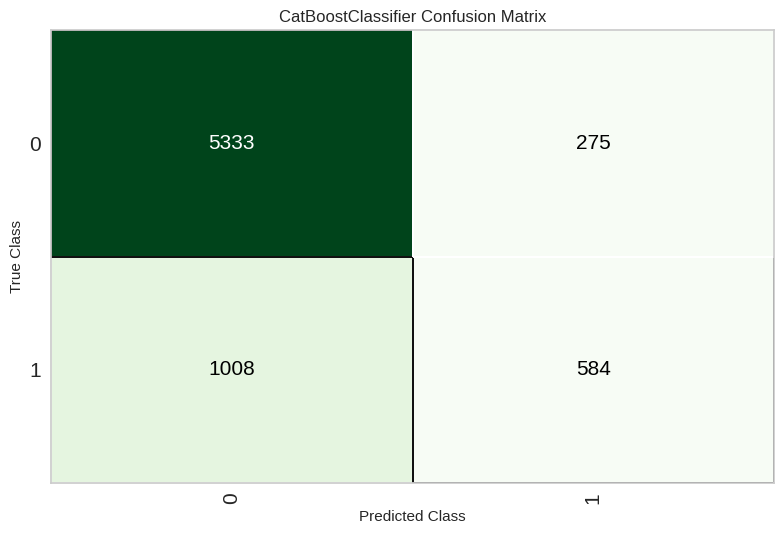

In [14]:
# plot confusion matrix :
#A confusion matrix is a visual representation that shows the performance of a classification model by displaying the counts of true positives, true negatives, false positives, and false negatives.
plot_model(best, plot = 'confusion_matrix')

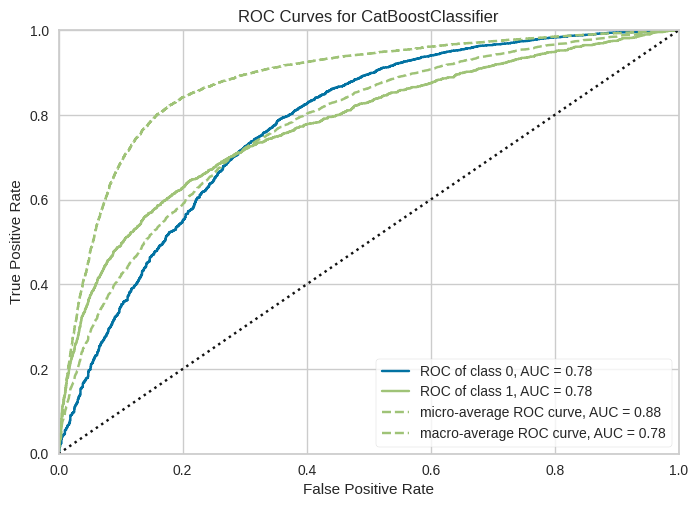

In [15]:
# plot AUC -> (Area Under the Curve) graph
plot_model(best, plot = 'auc')

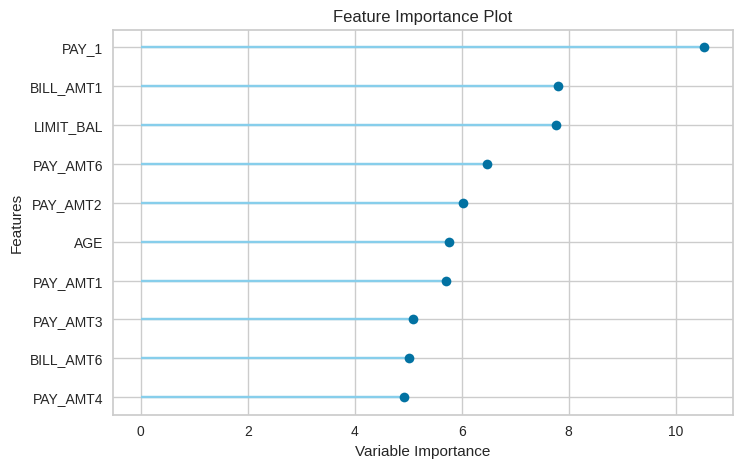

In [16]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternative to the plot_model function is evaluate_model, which can only be used in a notebook environment as it relies on ipywidgets.

In [18]:
##The evaluate_model function displays interactive visualizations of various performance metrics for the best-performing model in a notebook environment.
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The predict_model function adds prediction_label and prediction_score (the probability of the predicted class) as new columns to the dataframe. If no data is provided (default), it uses the test set created during the setup phase for predictions.

In [29]:
# predict on test set
test_predictions = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8218,0.7769,0.3668,0.6799,0.4765,0.3805,0.4069


In [30]:
# show predictions df
test_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
2117,50000,2,2,1,31,2,0,0,0,0,...,17240.0,1615.0,1670.0,605.0,626.0,654.0,567.0,1,1,0.6988
15328,200000,2,3,1,43,1,2,0,0,0,...,133262.0,0.0,5000.0,5000.0,7000.0,5000.0,5000.0,1,0,0.7775
16596,270000,1,1,2,32,0,0,0,0,0,...,56523.0,2000.0,5000.0,3000.0,4000.0,3000.0,3000.0,0,0,0.9559
20860,720000,2,2,2,38,1,-2,-2,-2,-2,...,970.0,2184.0,1744.0,7323.0,711.0,970.0,491.0,0,0,0.9555
1937,130000,2,2,2,24,1,-2,-1,-1,-1,...,937.0,0.0,3372.0,0.0,1001.0,939.0,1013.0,0,0,0.8765


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `default`. We can then use the new data frame without labels for scoring.

In [32]:
# copy data and drop Class variable

New_data = data.copy()
New_data.drop('default', axis=1, inplace=True)
New_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,90000,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
2,50000,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3,50000,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
4,50000,1,1,2,37,0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0


In [33]:
# predict model on new_data
predictions = predict_model(best, data = New_data)
predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.7590
1,90000,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.8796
2,50000,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.8621
3,50000,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.9625
4,50000,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0.7988


## Save Model
At last, we can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [34]:
# save pipeline
save_model(best, 'starting_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                                                               keep_empty_features=False,
                                                           

In [35]:
# load pipeline
loaded_best_pipeline = load_model('starting_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7fe652be10f0>)],
         verbose=False)